# Numerov's Algorithm & Shooting Method: Finite Square Well

### Time indepedent Schrodinger Equation

In units where $\hbar = 1$, the 1D TISE can be expressed in the form:

\begin{equation}
    \frac{d^2 \psi}{dx^2} = -2m\left(E - V(x) \right) \psi = -g(x) \psi
\end{equation}

This differential equation can be solved numerically via Numerov's method ([see page 10 - 11](http://www.fisica.uniud.it/~giannozz/Corsi/MQ/LectureNotes/mq-cap1.pdf)). For a 1D spatial grid, the wavefunction at the $n+1$th point along can be approximated by:

\begin{equation}
    \psi_{n+1} = \frac{(12-10f_n) \ \psi_n-f_{n-1}\psi_{n-1}}{f_{n+1}}
\end{equation}

where:
\begin{equation}
    f_n \equiv \left( 1 + \frac{\delta x^2}{12}g_n \right), \ \ \ \ \ \ \ g_n = 2m(E-V(x_n))
\end{equation}

Hence to start Numerov's method we require $\psi_0$ and $\psi_1$, in other words $\psi(x = x_{min})$ and $\psi(x = x_{min} + \delta x)$, where $\delta x$ is the step size.

### Shooting Method:

When investigating bound states we require $\psi( x \to \pm \infty) = 0$. However we cannot consider a infinite domain, instead we must choose a big enough domain that setting $\psi( x = x_{min}) = 0$ is a good approximation (and similarly for $x_{max}$).

With Numerov's Method in place, the shooting method can be used to find the energy eigenstates. It goes as follows:

1. Setting $\psi_0 = 0$ "satisfies" the boundary condition that the wavefunctions must vanish at the boundary
2. Since the Schrodinger Equation is linear and homogeneous we are free to set $\psi_1$ to any non-zero constant as multiplying by a constant does not affect the solution. In this case we shall set $\psi_1 = \delta x$.
3. Using the Numerov algorithm, $\psi(x)$ can be found. Exponential growth near $x_{max}$ can be observed if the input energy is not near a energy eigenvalue
4. A bisection search can be performed to calculate the energy eigenvalue and eigenstate

#### Bisection Search:

We wish to find a function $f(E) = 0$. First we must find values of $E$ which bracket the solution, that is:
<center>$f(E_1) > 0 \ $ and  $\ f(E_2) > 0$</center>
Evaluating $f$ at the midpoint $E_3 = \frac{1}{2}(E_1+E_2)$, depending on the result we can rebracket our solution. Hence the solution will be converged about with many iterations. Solutions can converge from both above and below $0$ so your search algorithm should account for this.

The search should be stopped when $\left| \ f(E)\right| < \epsilon$ where $\epsilon$ is a suitably small number.

<img src="shooting_search.png">

Dotted lines show the bracket solutions and the solid lines show the progression of the search to obtain the ground state of the infinite square well

## Exercises:

1. Write a Numerov routine for a finite square well potential of the form: $V = -V_0$ for $\left| \ x \ \right| < a$ elsewhere $V = 0$
2. Include a bisection search which calls the Numerov function until a solution is found. Choose large initial energy brackets to ensure a result is within range
3. Search for bound states and travelling wave states, by plotting them note their structure.
4. For $V_0 = 300$, $m = 1$ and $a = 0.15$, find and plot the <b>normalised</b> wavefunctions and energy eigenvalues

<IPython.core.display.Javascript object>


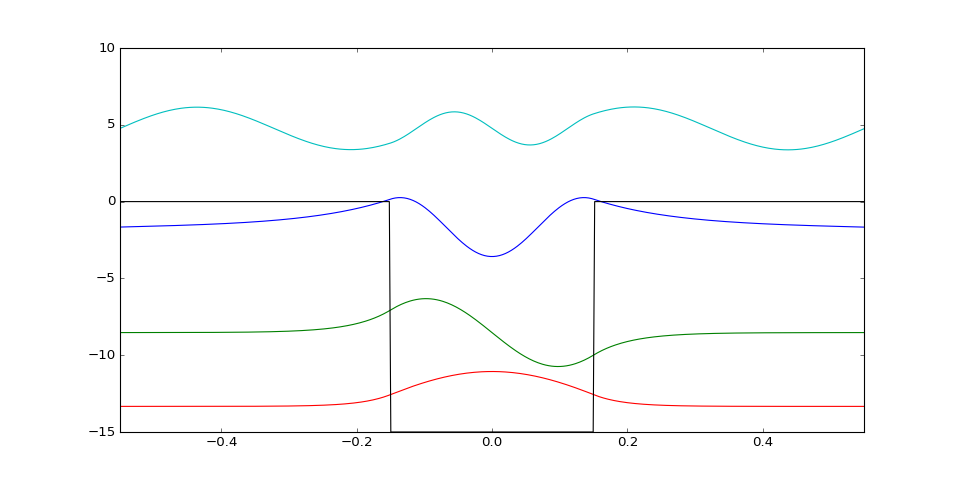

-33.160400390625
-170.55216655135155
-266.64886095561087
95.3125


(-0.55000000000000004, 0.55000000000000004)

In [2]:
#NAME: Shooting Method & Numerov's Algorithm
#DESCRIPTION: Solving the 1D time independent Schrödinger equation using the shooting method and Numerov's algorithm.

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

import pycav.quantum as pyq

%matplotlib notebook

def potential(params):
    def V(x):
        if abs(x) < params[1]:
            return -params[2]
        else:
            return 0.0
    return V

def normalise(psi,spacing):
    area = np.trapz(psi**2,dx = spacing)
    return psi / area**0.5

def squarewell_numbs(params):
    u_0 = params[0]*params[1]**2*params[2]/2.
    return 2*np.sqrt(u_0)/np.pi

domain = [-0.55,0.55]
steps = 500
L = domain[1]-domain[0]
dx = (domain[1]-domain[0])/steps
x = np.linspace(domain[0],domain[1],steps+1)

V_params = [1.0,0.15,300.]

V = potential(V_params)

fig = plt.figure(figsize = (12,6))
ax = plt.subplot(111)

bracket_E = [-150.,0.]
psi, E_bisect = pyq.bisection_search(x,dx,V,V_params,bracket_E,tolerance = 0.005)
print(E_bisect)

ax.plot(x,normalise(psi,dx)+0.05*E_bisect)

bracket_E = [-250,-35]
psi, E_bisect = pyq.bisection_search(x,dx,V,V_params,bracket_E,tolerance = 0.005)
print(E_bisect)

ax.plot(x,normalise(psi,dx)+0.05*E_bisect)

bracket_E = [-550,-170]
psi, E_bisect = pyq.bisection_search(x,dx,V,V_params,bracket_E,tolerance = 0.005)
print(E_bisect)

ax.plot(x,normalise(psi,dx)+0.05*E_bisect)

bracket_E = [0.,100.]
psi, E_bisect = pyq.bisection_search(x,dx,V,V_params,bracket_E,tolerance = 0.005)
print(E_bisect)

ax.plot(x,normalise(psi,dx)+0.05*E_bisect)

plot_V = [0.05*V(y) for y in x]
ax.plot(x,plot_V,'k')

ax.set_xlim([np.min(x),np.max(x)])